# Image Captioning Example

In [1]:
# !pip install nltk

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Import the necessary libraries

In [2]:
from os import listdir
from os import path
from pickle import load, dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import string
import re
from numpy import array, argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from nltk.translate.bleu_score import corpus_bleu

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Extract features from each image in the directory

In [20]:
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    model.summary()
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

### Extract features from all images

In [4]:
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

>1616016569_673de1d678.jpg
>3084018061_df66d98325.jpg
>3535284878_f90f10236e.jpg
>3591462960_86045906bd.jpg
>3459156091_c1879ebe28.jpg
>424307754_1e2f44d265.jpg
>405961988_fcfe97f31e.jpg
>3215117062_6e07a86352.jpg
>2817230861_d27341dec0.jpg
>453473508_682c0a7189.jpg
>90011335_cfdf9674c2.jpg
>1625306051_7099519baa.jpg
>2587017287_888c811b5a.jpg
>199463720_329a802206.jpg
>2187222896_c206d63396.jpg
>2647062476_5ef31ba867.jpg
>525968880_82623392d1.jpg
>2180480870_dcaf5ac0df.jpg
>3209523192_05a4cef844.jpg
>1921398767_771743bf4e.jpg
>2462153092_e3f4d8f6a2.jpg
>1430154945_71bbaa094a.jpg
>337647771_3b819feaba.jpg
>2561849813_ff9caa52ac.jpg
>2354792215_eef2bdc753.jpg
>3208553539_2bf6c6d162.jpg
>3005872315_e6771763bd.jpg
>2138487671_5b89104043.jpg
>390992388_d74daee638.jpg
>2764178773_d63b502812.jpg
>3169591322_d0b6d0cd04.jpg
>2632381125_de32bdfdf6.jpg
>514990193_2d2422af2c.jpg
>3561314880_ea9a7e245f.jpg
>2293149170_38fb2257ea.jpg
>3564157681_03a13b7112.jpg
>3700346840_bb80d622f7.jpg
>2445283938

>3273489163_8209545810.jpg
>3161044966_27bf6f9dec.jpg
>3643684688_2f7157b23d.jpg
>2824922268_3fafb64683.jpg
>3585117340_73e96b6173.jpg
>3671777903_6fbf643980.jpg
>3707990914_843e8f15f1.jpg
>2890075175_4bd32b201a.jpg
>2196846255_2c1635359a.jpg
>1350948838_fdebe4ff65.jpg
>3721082512_8277087f3f.jpg
>3397633339_d1ae6d9a0e.jpg
>3525841965_7814484515.jpg
>3484576025_a8c50942aa.jpg
>2303426046_09cfd7bc4e.jpg
>3321956909_7b5ddf500f.jpg
>3619232550_0b1e1fd4e4.jpg
>3621649810_cca783b777.jpg
>1095580424_76f0aa8a3e.jpg
>2968885599_0672a5f016.jpg
>2522467011_cc825d89ac.jpg
>900144365_03cd1899e3.jpg
>929679367_ff8c7df2ee.jpg
>3266261886_36e1323d2f.jpg
>1348891916_ebd4413033.jpg
>319870744_0e0138d205.jpg
>478750151_e0adb5030a.jpg
>3640407952_bb38fb9d55.jpg
>150582765_bad8dec237.jpg
>263522013_d118d46b2d.jpg
>3151365121_e2a685a666.jpg
>3383037991_8f07784b81.jpg
>1075716537_62105738b4.jpg
>3726076549_0efb38854b.jpg
>306318683_5f1f875191.jpg
>2706766641_a9df81969d.jpg
>3452411712_5b42d2a1b5.jpg
>2439384

>864290968_eccb46d5ab.jpg
>429270993_294ba8e64c.jpg
>219843859_94b6d0a580.jpg
>161669933_3e7d8c7e2c.jpg
>371364900_5167d4dd7f.jpg
>3193335577_9bdbaf9f70.jpg
>408573233_1fff966798.jpg
>2301867590_98c0ecb0cb.jpg
>3535304540_0247e8cf8c.jpg
>2972929655_04233b5489.jpg
>531055369_936fd76a63.jpg
>2490179961_e842fda5eb.jpg
>3569755200_cef7ee2233.jpg
>3092200805_dd1f83ddbe.jpg
>2647394564_4843800cff.jpg
>3715559023_70c41b31c7.jpg
>475313618_bdb2f72be5.jpg
>2115631346_9585a479b0.jpg
>103195344_5d2dc613a3.jpg
>269898095_d00ac7d7a4.jpg
>2251447809_2de73afcdf.jpg
>3413019648_e787f0cb88.jpg
>107318069_e9f2ef32de.jpg
>3050650135_23f9d9d2f8.jpg
>3468130925_2b1489d19a.jpg
>3526897578_3cf77da99b.jpg
>2573141440_28a762d537.jpg
>1814391289_83a1eb71d3.jpg
>131632409_4de0d4e710.jpg
>3484070900_3e76d7fd30.jpg
>870710405_51e507b31a.jpg
>3558251719_3af5ae2d02.jpg
>3572144280_ea42bbd927.jpg
>1095476286_87d4f8664e.jpg
>3523819210_99782628fc.jpg
>3624327440_bef4f33f32.jpg
>3537806062_c50d814aba.jpg
>3468346269_9d

>483841513_e660391880.jpg
>3261666285_86fceb762d.jpg
>3512127856_18a4c7aace.jpg
>942399470_6132d3e5d2.jpg
>2737759676_4bc9be2daf.jpg
>3207343907_995f7ac1d2.jpg
>3373946160_1c82d54442.jpg
>2647593678_1fa3bb516c.jpg
>124972799_de706b6d0b.jpg
>2430860418_fd0726f414.jpg
>2878578240_caf64c3b19.jpg
>3113769557_9edbb8275c.jpg
>3323076458_3ce72a1dae.jpg
>442594271_2c3dd38483.jpg
>262681159_e5fed3acf0.jpg
>539751252_2bd88c456b.jpg
>3514179514_cbc3371b92.jpg
>3208571574_6dc1a461c5.jpg
>3386893620_5f0bb4e794.jpg
>3501936223_6122a13d27.jpg
>811663364_4b350a62ce.jpg
>3602676311_824b2c04ba.jpg
>3241487502_f4f0cc4a8a.jpg
>3618908551_7fd2de5710.jpg
>173020287_230bfc4ffc.jpg
>3050114829_18bc5a6d7c.jpg
>2275029674_6d4891c20e.jpg
>2694890967_7c7a89de16.jpg
>3245266444_2e798096e6.jpg
>2867845624_22e4fe0a23.jpg
>3273625566_2454f1556b.jpg
>490044494_d2d546be8d.jpg
>2975807155_5a8610c297.jpg
>162743064_bb242faa31.jpg
>3168841415_c0705a327a.jpg
>2245618207_fa486ba2b7.jpg
>1414779054_31946f9dfc.jpg
>3506216254

>251056963_c8b67f0107.jpg
>2882056260_4399dd4d7c.jpg
>2384147448_c1869070d3.jpg
>1579287915_4257c54451.jpg
>3028095878_07341efc9c.jpg
>394463341_5311c53783.jpg
>3029043380_b28644ea5d.jpg
>2690538407_7ca157be85.jpg
>241347243_c751557497.jpg
>2297471897_3419605c16.jpg
>3613800013_5a54968ab0.jpg
>3230132205_dccfafa5ee.jpg
>3115354165_44dbeec6c1.jpg
>2557922709_24d2a9655a.jpg
>2343879696_59a82f496f.jpg
>350443876_c9769f5734.jpg
>1517340899_ee1c74a8f6.jpg
>2265367960_7928c5642f.jpg
>3096163135_584901a5ae.jpg
>489865145_65ea6d1c14.jpg
>3190677999_60bbd330fd.jpg
>2840344516_8e15fe2668.jpg
>2831217847_555b2f95ca.jpg
>1244306891_8e78ae1620.jpg
>241345721_3f3724a7fc.jpg
>2564888404_b57f89d3c7.jpg
>3532782283_341f0381a3.jpg
>872135364_8c1e47d163.jpg
>367925122_335ed279a8.jpg
>2373234213_4ebe9c4ee5.jpg
>3265578645_4044a7049a.jpg
>2502835694_4fe121bbea.jpg
>2976537455_f3988c2d46.jpg
>476740978_45b65ebe0c.jpg
>3040051410_6205682ba3.jpg
>3061481868_d1e00b1f2e.jpg
>3636543173_15f56515e5.jpg
>360856760

>3130970054_04a3865c43.jpg
>1107246521_d16a476380.jpg
>488089932_c3a5fa4140.jpg
>2305437797_e6c3460190.jpg
>2778290592_1910bb0431.jpg
>146577646_9e64b8c2dc.jpg
>426805536_d1d5e68c17.jpg
>1104133405_c04a00707f.jpg
>3344632789_af90d54746.jpg
>2095007523_591f255708.jpg
>3247598959_5b2348444c.jpg
>2285152690_3fb93f65f1.jpg
>3691622437_f13644273c.jpg
>2498897831_0bbb5d5b51.jpg
>961611340_251081fcb8.jpg
>3336808362_c17837afd8.jpg
>387078972_514a38dc33.jpg
>3403797144_53e49412ec.jpg
>3134586018_ae03ba20a0.jpg
>3341782693_426bf7139b.jpg
>3111482098_11c0f4f309.jpg
>2431723485_bc6b8e6418.jpg
>3207676216_48478bce97.jpg
>2589241160_3832440850.jpg
>3427233064_6af01bfc5c.jpg
>2355763034_9fb61a8165.jpg
>3590593467_be497a6139.jpg
>3537218226_478d2e4f26.jpg
>3389448506_7025e7cc12.jpg
>293151893_ee7249eccb.jpg
>2730938963_c4ed3e2258.jpg
>3432550415_e7b77232de.jpg
>3171250845_5ae0d2a8bc.jpg
>1835511273_790eaae6e6.jpg
>3069037969_bb7319e0dc.jpg
>3464708890_3cab754998.jpg
>3086507638_d8a2cd0ac3.jpg
>236439

>2333288869_8c01e4c859.jpg
>2636514498_01fcc5f501.jpg
>1057210460_09c6f4c6c1.jpg
>1198194316_543cc7b945.jpg
>3547704737_57d42d5d9d.jpg
>3490044563_8eb551ef59.jpg
>2220612655_030413b787.jpg
>2570365455_41cc9a7d2b.jpg
>460478198_83039f2593.jpg
>2746839158_4195210d27.jpg
>506478284_7cf8bdbe36.jpg
>3639363462_bcdb21de29.jpg
>2417745327_a2c2705043.jpg
>1679557684_50a206e4a9.jpg
>2463067409_78188c584c.jpg
>2789238858_14261dd25a.jpg
>278002947_3fd22a2cb6.jpg
>3474406285_01f3d24b71.jpg
>3482474257_a88bfe5c57.jpg
>3386953179_84c2d7922f.jpg
>2998861375_02817e0147.jpg
>3286543624_7a327f79ae.jpg
>1424237335_b3be9920ba.jpg
>3043685748_130db75e3b.jpg
>3035949542_cb249790f5.jpg
>3456251289_c4ae31d817.jpg
>2053733930_e245615ad4.jpg
>237277765_9e6fa5b99a.jpg
>3258472448_75cfab5e6f.jpg
>2301525531_edde12d673.jpg
>1277743944_f4e8c78403.jpg
>2215136723_960edfea49.jpg
>3479423813_517e93a43a.jpg
>2877088081_7ca408cb25.jpg
>3606093421_eddd46c2c7.jpg
>186346360_541047336f.jpg
>874665322_9ad05c4065.jpg
>292950

>222878446_32c6fc4bc9.jpg
>3584930205_a3f58a4b7c.jpg
>2559114800_17310f3015.jpg
>370614351_98b8a166b9.jpg
>649596742_5ba84ce946.jpg
>234241682_51d9fabb27.jpg
>3650986674_3e101c606b.jpg
>3211577298_14296db6fd.jpg
>2596514158_c516e57974.jpg
>3189251454_03b76c2e92.jpg
>3178005751_fca19815ac.jpg
>3530342993_a4a1f0e516.jpg
>3539767254_c598b8e6c7.jpg
>3014773357_f66bd09290.jpg
>3343900764_2a4c0405f9.jpg
>3672057606_cb6393dbd9.jpg
>3085973779_29f44fbdaa.jpg
>3201666946_04fe837aff.jpg
>2914331767_8574e7703d.jpg
>3599442049_e448c7c9b2.jpg
>2998504949_1022fec53b.jpg
>3727740053_3baa94ffcb.jpg
>3191982761_88793192ed.jpg
>1659358133_95cd1027bd.jpg
>3099694681_19a72c8bdc.jpg
>3492180255_0bd48a18f8.jpg
>2917843040_7c9caaaa8a.jpg
>3120189281_1938460e85.jpg
>504385521_6e668691a3.jpg
>2291485126_b8d41a63f4.jpg
>1112212364_0c48235fc2.jpg
>3240094420_a9eea11d39.jpg
>2112661738_de71b60b88.jpg
>2424111022_4e332b8aee.jpg
>1468389504_c724bdcad0.jpg
>267164457_2e8b4d30aa.jpg
>95734035_84732a92c1.jpg
>49490702

>241347547_902725b9f8.jpg
>1237985362_dbafc59280.jpg
>2702506716_17a7fb3ba4.jpg
>241347496_1a35fec8dc.jpg
>3352697012_751b079bbb.jpg
>460350019_af60511a3b.jpg
>1713248047_d03721456d.jpg
>3130064588_6d1d3fa2dd.jpg
>1432342377_3e41603f26.jpg
>2286236765_2a63eeb550.jpg
>2194286203_5dc620006a.jpg
>2991375936_bf4b0a7dc0.jpg
>3720210639_18bb34e475.jpg
>1417295167_5299df6db8.jpg
>3519155763_045a6a55e2.jpg
>502671104_b2114246c7.jpg
>3563673070_71fa0903ed.jpg
>3211210739_3dea005fde.jpg
>241031254_0c6f30e3d1.jpg
>3616808182_fb4eaec778.jpg
>3342855466_44038a8aa3.jpg
>1312020846_5abb4a9be2.jpg
>3079787482_0757e9d167.jpg
>733964952_69f011a6c4.jpg
>2086534745_1e4ab80078.jpg
>3068735836_872fba3068.jpg
>380527679_574749123d.jpg
>2701487024_e866eb4550.jpg
>3626475209_f71cdd06bd.jpg
>2609847254_0ec40c1cce.jpg
>3677514746_26f5588150.jpg
>3368569524_a9df2fc312.jpg
>2427490900_5b7a8874b9.jpg
>2218907190_5f43bf5e4d.jpg
>112178718_87270d9b4d.jpg
>397725001_e51f7c391c.jpg
>512101751_05a6d93e19.jpg
>241347635_

>2465691083_894fc48af6.jpg
>3590654365_fd4819f48b.jpg
>205682549_713aa6cd88.jpg
>3416246113_1745559b6b.jpg
>3651107058_d84d4c3c25.jpg
>3475552729_a3abd81ee6.jpg
>452363869_cad37e609f.jpg
>554526471_a31f8b74ef.jpg
>3732728142_86364a706e.jpg
>2121140070_a09644550b.jpg
>3401437960_7da856e004.jpg
>2947452329_08f2d2a467.jpg
>3677302645_8cd3fac70d.jpg
>485054073_fef8b80b4b.jpg
>300500054_56653bf217.jpg
>501699433_f8df386cf9.jpg
>181157221_e12410ef0b.jpg
>2187904131_96ea83b9b5.jpg
>3222055946_45f7293bb2.jpg
>1321723162_9d4c78b8af.jpg
>862177617_c2c0581075.jpg
>3681324243_b69fa90842.jpg
>2911245290_b2c79f328a.jpg
>1361420539_e9599c60ae.jpg
>3427852996_d383abd819.jpg
>3638178504_be1ff246bd.jpg
>2404488732_ca1bbdacc2.jpg
>3657016761_d553e514d9.jpg
>3381392182_db2c42430e.jpg
>3251460982_4578a568bb.jpg
>2655196158_5c878a4af0.jpg
>3100251515_c68027cc22.jpg
>3649916507_b88a3d2082.jpg
>3043266735_904dda6ded.jpg
>2564663851_3a9832e4fc.jpg
>3244734844_c318c29c23.jpg
>241347204_007d83e252.jpg
>347558108

>1119015538_e8e796281e.jpg
>3347500603_13670ee6bf.jpg
>2862676319_a9dab1309f.jpg
>923550133_ac9d7a2932.jpg
>688940111_325a74674a.jpg
>2482629385_f370b290d1.jpg
>2272548482_0b4aec5cdd.jpg
>3561433412_3985208d53.jpg
>2660008870_b672a4c76a.jpg
>3687222696_85bf6f78f7.jpg
>3517023411_a8fbd15230.jpg
>1096097967_ac305887b4.jpg
>2939007933_8a6ef2d073.jpg
>241346215_037e18403a.jpg
>1056359656_662cee0814.jpg
>3306951622_93b82cac21.jpg
>2814406547_a237ef0122.jpg
>3181322965_ce9da15271.jpg
>2419186511_f0ce5f9685.jpg
>3524519277_bd0c3e7382.jpg
>491600485_26c52c8816.jpg
>3500139659_b2a60b0141.jpg
>479807115_3a484fb18b.jpg
>2097398349_ff178b3f1b.jpg
>3391209042_d2de8a8978.jpg
>958326692_6210150354.jpg
>2502935765_a0ae1fa7be.jpg
>2375924666_fee50f1cba.jpg
>3046259614_614394e024.jpg
>3030793171_55cd646eed.jpg
>3187117682_986ffd6b67.jpg
>469021173_aa31c07108.jpg
>2324917982_f3db8c11e9.jpg
>3084034954_fe5737197d.jpg
>2501595799_6316001e89.jpg
>241346885_f519ece460.jpg
>236474697_0c73dd5d8b.jpg
>307934164

>2554531876_5d7f193992.jpg
>3460551728_63255cec18.jpg
>3632225464_612d7b4c0f.jpg
>44129946_9eeb385d77.jpg
>3608752424_01a1cfd8a6.jpg
>417966898_a04f9b5349.jpg
>3713324467_104d72f7db.jpg
>2382411771_a16145f345.jpg
>2882483779_73c171ac19.jpg
>269650644_059a84ece5.jpg
>268365231_a0acecdc45.jpg
>3415113018_7b95ddcd11.jpg
>3189941492_a3f4347b1a.jpg
>3034585889_388d6ffcc0.jpg
>2218519240_cac5aab53c.jpg
>2537583012_4a358a6a8a.jpg
>3286620180_4b00e93e8e.jpg
>2878190821_6e4e03dc5f.jpg
>1655781989_b15ab4cbff.jpg
>114949897_490ca7eaec.jpg
>2876994989_a4ebbd8491.jpg
>3107463441_7c68606450.jpg
>3527590601_38d56abc29.jpg
>3308488725_f91d9aba27.jpg
>3362189985_fbae8f860a.jpg
>2526041608_a9775ab8d7.jpg
>1827560917_c8d3c5627f.jpg
>2195887578_3ba2f29b48.jpg
>1313961775_824b87d155.jpg
>3330675488_8692476a4a.jpg
>3375991133_87d7c40925.jpg
>3597210806_95b07bb968.jpg
>3560125106_691c292893.jpg
>2315418282_80bd0bb1c0.jpg
>3708266246_97a033fcc7.jpg
>3012513414_86180c44cb.jpg
>3065560742_f6e266ccd9.jpg
>339334

>2999162229_80d17099b6.jpg
>3533775651_9d7e93dacf.jpg
>2944193661_7b255af9cc.jpg
>281419391_522557ce27.jpg
>2556392380_ee57514233.jpg
>1389323170_d1c81d6b51.jpg
>3601569729_bf4bf82768.jpg
>2502079538_10ef2e976b.jpg
>3541962817_78bcd3835b.jpg
>2183227136_8bb657846b.jpg
>2520909293_9bb7f7364e.jpg
>3297272270_285b8878b2.jpg
>2322601965_748d59dc57.jpg
>181103691_fb2f956abd.jpg
>3227111573_c82f7d68b1.jpg
>3615239961_62b4dbc174.jpg
>2335428699_4eba9b6245.jpg
>757046028_ff5999f91b.jpg
>3612485097_b706d950ed.jpg
>3578981202_efef47e264.jpg
>491964988_414b556228.jpg
>109260216_85b0be5378.jpg
>3403370354_5d266873b4.jpg
>2148991939_3b9fd6c439.jpg
>3226796100_08c49cfa5c.jpg
>2911238432_33ec2d8cec.jpg
>3710353645_8fbfaa4175.jpg
>2199250692_a16b0c2ae1.jpg
>1222322358_225067636e.jpg
>2591486448_48d5438343.jpg
>3534668485_6887629ff0.jpg
>2414397449_2ac3b78e0d.jpg
>2998945968_86f236d1e8.jpg
>947664583_7c63172366.jpg
>3235746553_a40416c00e.jpg
>1785138090_76a56aaabc.jpg
>241345864_138471c9ea.jpg
>3537400

>236730743_0d4fd8de5a.jpg
>424506167_01f365726b.jpg
>1346529555_e916816cfe.jpg
>2664102751_d5a737a566.jpg
>2886533440_dfa832f2fa.jpg
>3721881082_afe9fc734e.jpg
>393810324_1c33760a95.jpg
>3531811969_49af4c22f0.jpg
>241347271_a39a5a0070.jpg
>531152619_6db02a7ed9.jpg
>3547499166_67fb4af4ea.jpg
>3087485737_cb09bc80b6.jpg
>2924884815_63826aa60d.jpg
>3461110860_37ef15af8e.jpg
>2500826039_165e75b20c.jpg
>3396275223_ee080df8b5.jpg
>2312747482_20a81b2230.jpg
>3717845800_ab45e255b8.jpg
>3398745929_8cd3bbb8a8.jpg
>3547647914_4dd56a8c1b.jpg
>3004291093_35d6fd8548.jpg
>3413669228_ec64efeb34.jpg
>3048597471_5697538daf.jpg
>3728256505_7f8db8270d.jpg
>3532587748_7e64bb223a.jpg
>373394550_1b2296b8c4.jpg
>2328616978_fb21be2b87.jpg
>3372215826_b3e6403b2e.jpg
>343073813_df822aceac.jpg
>3686924335_3c51e8834a.jpg
>3173461705_b5cdeef1eb.jpg
>3015891201_2c1a9e5cd7.jpg
>1002674143_1b742ab4b8.jpg
>1836335410_de8313a64e.jpg
>290982269_79fc9f36dc.jpg
>3037558954_20115165e3.jpg
>3105929913_94a6882e25.jpg
>20750413

>3433982387_3fa993cf5a.jpg
>2839890871_4b7c7dbd96.jpg
>2054308369_f9c6ec7815.jpg
>3196995975_3e38eabf01.jpg
>3601978895_9fec23ce0c.jpg
>2344699642_4fae2f4e07.jpg
>2832076014_ff08c92037.jpg
>2588927489_f4da2f11ec.jpg
>2683963310_20dcd5e566.jpg
>782017931_75d92bb7a4.jpg
>953941506_5082c9160c.jpg
>2390778197_4d9d03d4b9.jpg
>260392825_ea61660633.jpg
>315436114_6d386b8c36.jpg
>778885185_3f6905370b.jpg
>267325341_1a96ef436e.jpg
>3630332976_fdba22c50b.jpg
>1093737381_b313cd49ff.jpg
>3533394378_1513ec90db.jpg
>2865564810_5c63328cd4.jpg
>3055716848_b253324afc.jpg
>1055623002_8195a43714.jpg
>2366643786_9c9a830db8.jpg
>3287236038_8998e6b82f.jpg
>2102360862_264452db8e.jpg
>551664516_78a5131dc4.jpg
>2978735290_7464b12270.jpg
>462080147_ca088e6541.jpg
>2101808682_0d66ef4a08.jpg
>2479162876_a5ce3306af.jpg
>2844747252_64567cf14a.jpg
>2894576909_99c85fd7a7.jpg
>391723162_3bdeb7ea33.jpg
>1456393634_74022d9056.jpg
>520491467_54cbc0a866.jpg
>2604825598_593a825b5b.jpg
>2903617548_d3e38d7f88.jpg
>3639105305

>2655183854_5852790214.jpg
>3723903586_e98d3d8ec7.jpg
>3278189732_f750cb26b7.jpg
>3259991972_fce3ab18b2.jpg
>2891924845_92f69b0f18.jpg
>2597873827_a5cb3e57ba.jpg
>2426781076_e3f4d2685c.jpg
>2511762757_bd0ab0a017.jpg
>2828583747_8cfb7217af.jpg
>3349528565_0bc013b70a.jpg
>608257195_6ec6f48e37.jpg
>3191805046_77c334b506.jpg
>2521938720_911ac092f7.jpg
>3269895626_7b253c82ed.jpg
>262439544_e71cd26b24.jpg
>311146855_0b65fdb169.jpg
>3182258223_5b9c8a8c55.jpg
>1425069590_570cc7c2d8.jpg
>3666324102_18ecdf8253.jpg
>3036033157_522a43a550.jpg
>2490365757_b869282cb3.jpg
>2600442766_e750ec9a56.jpg
>3439414478_8038ba9409.jpg
>3248752274_96740ed073.jpg
>2926233397_71e617f3a3.jpg
>2458862292_466a920ee2.jpg
>3127142756_bf0bfcb571.jpg
>3653484549_f316590b0f.jpg
>2103568100_5d018c495b.jpg
>3710468717_c051d96a5f.jpg
>1299459562_ed0e064aee.jpg
>3064716525_b8418d4946.jpg
>3411595210_8e0893b266.jpg
>2623982903_58ec7c5026.jpg
>3516312179_f520469038.jpg
>1141718391_24164bf1b1.jpg
>822836318_21544f0f78.jpg
>2752

>109823397_e35154645f.jpg
>2367317953_503317493e.jpg
>487894806_352d9b5e66.jpg
>504904434_889f426c6e.jpg
>2656039837_f46b29af92.jpg
>2712352554_1cafd32812.jpg
>2845845721_d0bc113ff7.jpg
>2973269132_252bfd0160.jpg
>84713990_d3f3cef78b.jpg
>3159092624_66af4e207e.jpg
>854333409_38bc1da9dc.jpg
>2716251485_d6113f4c8a.jpg
>2797149878_bb8e27ecf9.jpg
>1187593464_ce862352c6.jpg
>3225025519_c089c14559.jpg
>344841963_8b0fa9784c.jpg
>3097171315_0ba7d283b1.jpg
>2426303900_0a8d52eb14.jpg
>2657484284_daa07a3a1b.jpg
>3370308329_7f2de5bb58.jpg
>3707283973_5cdaa39340.jpg
>3426144752_28d63615ca.jpg
>1420060118_aed262d606.jpg
>3496028495_431cfdc042.jpg
>1324816249_86600a6759.jpg
>3286761458_34af7e4499.jpg
>1433142189_cda8652603.jpg
>2192026581_b782d1355a.jpg
>3257207516_9d2bc0ea04.jpg
>2473737724_355599a263.jpg
>1799271536_6e69c8f1dc.jpg
>527288854_f26127b770.jpg
>1348304997_afe60a61df.jpg
>3209966887_5b744bd050.jpg
>3436074878_21515a6706.jpg
>1527333441_af65636a74.jpg
>69189650_6687da7280.jpg
>2855727603

>2544182005_3aa1332bf9.jpg
>2511019188_ca71775f2d.jpg
>2676649969_482caed129.jpg
>457875937_982588d918.jpg
>2115620856_4fa5025ac6.jpg
>1562392511_522a26063b.jpg
>3343197133_9256848fa9.jpg
>2905942129_2b4bf59bc0.jpg
>3453544202_3855ab34b6.jpg
>3408274796_0dc62225e9.jpg
>241347803_afb04b12c4.jpg
>3349194268_0ee555c9a2.jpg
>2234702530_a265a4df22.jpg
>3204525212_d548c7fca7.jpg
>3500342526_393c739e2f.jpg
>597543181_6a85ef4c17.jpg
>195962284_e57178054a.jpg
>3066491113_86569e15be.jpg
>2863349041_5eba6e3e21.jpg
>2640153227_57cf1a3d92.jpg
>2596876977_b61ee7ee78.jpg
>3525403875_7f95e0cbfe.jpg
>3232030272_b2480a5fe7.jpg
>3583321426_f373c52161.jpg
>2472720629_d9a6736356.jpg
>3108732084_565b423162.jpg
>399212516_d68046b277.jpg
>3262475923_f1f77fcd9f.jpg
>2813033949_e19fa08805.jpg
>3509611207_7645b1d28d.jpg
>2565618804_8d7ed87389.jpg
>2711075591_f3ee53cfaa.jpg
>2136992638_098d62a3c5.jpg
>2607130765_97833d6ce1.jpg
>2298946012_22de913532.jpg
>3537452619_3bd79f24e0.jpg
>2162469360_ff777edc95.jpg
>18599

>3340857141_85d97a7466.jpg
>295729735_8360f2e64c.jpg
>3643074723_94d42b7a0c.jpg
>2193223202_4d908c0450.jpg
>2295216243_0712928988.jpg
>2112921744_92bf706805.jpg
>351876121_c7c0221928.jpg
>2766325714_189bbff388.jpg
>270816949_ffad112278.jpg
>2665461736_595c87f0a3.jpg
>441398149_297146e38d.jpg
>3704995657_e2e114083d.jpg
>2363006088_b3e3aa5c0b.jpg
>2584020755_14e2b3e8fc.jpg
>2912476706_9a0dbd3a67.jpg
>3443351431_7b4061df5c.jpg
>3060519665_4d6b9a51b2.jpg
>3690159129_93ba49ea18.jpg
>3564543247_05cdbc31cf.jpg
>2471493912_2d4746b834.jpg
>3661659196_6ed90f96c0.jpg
>3654338683_13b2f95a9a.jpg
>1167669558_87a8a467d6.jpg
>3640020134_367941f5ec.jpg
>2870875612_2cbb9e4a3c.jpg
>1809796012_a2dac6c26b.jpg
>2307118114_c258e3a47e.jpg
>1581822598_0ae23074f1.jpg
>3239480519_22540b5016.jpg
>3458559770_12cf9f134e.jpg
>3337046794_296bd2c7e0.jpg
>2752084369_52e7867da7.jpg
>3677693858_62f2f3163f.jpg
>172097782_f0844ec317.jpg
>3462454965_a481809cea.jpg
>3520617304_e53d37f0af.jpg
>1368383637_614646cc4a.jpg
>30968

>3722507770_0d6cb7420e.jpg
>3213395965_2a823c6865.jpg
>3477369101_8e0c61d8f4.jpg
>3239866450_3f8cfb0c83.jpg
>1026685415_0431cbf574.jpg
>3541491057_61a49588d9.jpg
>2825483885_3f7c54db3e.jpg
>3497224764_6e17544e0d.jpg
>2269795781_46a296aa21.jpg
>3398788809_25c71ba018.jpg
>3225310099_d8e419ba56.jpg
>3094064787_aed1666fc9.jpg
>2707244524_d57120d74a.jpg
>2782433864_5a0c311d87.jpg
>290650302_ade636da35.jpg
>3357416302_fcfcdd7b86.jpg
>3203908917_53e53c03d1.jpg
>1527513023_3d8152b379.jpg
>799486353_f665d7b0f0.jpg
>2528521798_fb689eba8d.jpg
>3043908909_bb54d2c08e.jpg
>3584561689_b6eb24dd70.jpg
>2131762850_5293a288d9.jpg
>3587092143_c63030ed6d.jpg
>3134387321_3a253224c1.jpg
>3027850131_a7772e0ba0.jpg
>1009434119_febe49276a.jpg
>1225443522_1633e7121f.jpg
>3170802797_3c851bb475.jpg
>2087317114_cf06df5aa5.jpg
>267836606_bbea2267c8.jpg
>2409312675_7755a7b816.jpg
>3317960829_78bbfafbb6.jpg
>3587009091_37188fd07e.jpg
>3504881781_6a842e043b.jpg
>2736902411_a0010f89ae.jpg
>2192131110_8a40e7c028.jpg
>270

>3158680604_c1f99b3946.jpg
>2649850541_59a6c7f01c.jpg
>3339558806_b4afdc8394.jpg
>3313232606_4ce7e16b87.jpg
>2236016316_f476cbbf06.jpg
>3354474353_daf9e168cf.jpg
>3671935691_57bdd0e778.jpg
>225699652_53f6fb33cd.jpg
>3357194782_c261bb6cbf.jpg
>138718600_f430ebca17.jpg
>3362592729_893e26b806.jpg
>3018467501_a03d404413.jpg
>3370085095_6abbb67c1d.jpg
>1572286502_64e5c4b920.jpg
>2339573065_91f1e3be60.jpg
>3582914905_f58db879ae.jpg
>3215238223_29de2b35cb.jpg
>3336374196_f6eaca542f.jpg
>3729405438_6e79077ab2.jpg
>544301311_5e7d69a517.jpg
>3401333624_4b6af8c1d7.jpg
>2894850774_2d530040a1.jpg
>430173345_86388d8822.jpg
>219301555_17883a51bd.jpg
>2545363449_1985903f82.jpg
>3612825666_54f5a2bc06.jpg
>3362805914_72f60ee8cb.jpg
>272283076_2d4aa1d5cf.jpg
>3052038928_9f53aa2084.jpg
>3154813159_58a195236d.jpg
>1606988704_fe330878a3.jpg
>2757803246_8aa3499d26.jpg
>3344531479_03c69750e9.jpg
>2288530008_4ebcee2174.jpg
>2665586311_9a5f4e3fbe.jpg
>3393035454_2d2370ffd4.jpg
>2083778090_3aecaa11cc.jpg
>348482

>3613667665_1881c689ea.jpg
>3405720825_b6991005eb.jpg
>494921598_af73bda568.jpg
>3029472296_d429b1586c.jpg
>3197247245_9c93b60b8a.jpg
>3329169877_175cb16845.jpg
>3016741474_72b4355198.jpg
>3107592525_0bcd00777e.jpg
>241346580_b3c035d65c.jpg
>54723805_bcf7af3f16.jpg
>2458006588_754c4aa09c.jpg
>3006093003_c211737232.jpg
>2661138991_d55aa0e5dc.jpg
>128912885_8350d277a4.jpg
>618771382_459bb492e4.jpg
>3293751640_d81a6f3a0c.jpg
>2241768909_3d96d48417.jpg
>2561481438_447b852e4d.jpg
>3134341610_3c55e373a7.jpg
>2171576939_d1e72daab2.jpg
>492802403_ba5246cfea.jpg
>1295698260_e10c53c137.jpg
>455611732_d65bf3e976.jpg
>3433259846_800a6079f0.jpg
>123997871_6a9ca987b1.jpg
>3108378861_d2214d971e.jpg
>3437654963_c4fdc17e8b.jpg
>267162122_c3437414ec.jpg
>3036596725_541bbe0955.jpg
>2907073768_08fd7bdf60.jpg
>2574509968_e4692ae169.jpg
>518144037_9a1754b2a6.jpg
>2872963574_52ab5182cb.jpg
>3618932839_acd7d2c2ea.jpg
>3662909101_21b9e59a3e.jpg
>3667404919_b273df57e4.jpg
>1731546544_9fbf14617b.jpg
>3576259024_

>58368365_03ed3e5bdf.jpg
>166321294_4a5e68535f.jpg
>3640104986_5d8c9a9948.jpg
>2675685200_0913d84d9b.jpg
>3578841731_f775cab089.jpg
>3088399255_1bd9a6aa04.jpg
>881725588_efabbcd96a.jpg
>3538213870_9856a76b2a.jpg
>3616525288_9c19223de6.jpg
>1797507760_384744fb34.jpg
>2393298349_e659308218.jpg
>3093970461_825b0cac2f.jpg
>905355838_3a43fdfd4e.jpg
>2282260240_55387258de.jpg
>3000722396_1ae2e976c2.jpg
>3425127583_611200619a.jpg
>256958382_b9006bfc5b.jpg
>469969326_4b84073286.jpg
>2940594396_20c40947b0.jpg
>3726700898_c50494b8bd.jpg
>2560388887_55abc9083d.jpg
>3358558292_6ab14193ed.jpg
>3568065409_1c381aa854.jpg
>532914728_c5d8d56b0b.jpg
>2534194182_ac53035cf4.jpg
>3416091866_a96003d652.jpg
>3245504245_27931f5ec1.jpg
>3359089834_263e529c71.jpg
>1463638541_c02cfa04dc.jpg
>3249062399_0dafe5e4f5.jpg
>3089107423_81a24eaf18.jpg
>3549006919_3604bc813e.jpg
>523991446_65dbc5a4a5.jpg
>2209496328_2a34fd201d.jpg
>3231575742_31732664cf.jpg
>3246190363_68d903bfcb.jpg
>2447035752_415f4bb152.jpg
>212562663

>3461437556_cc5e97f3ac.jpg
>3052196390_c59dd24ca8.jpg
>2353119813_685bace18e.jpg
>3128514681_a51b415c31.jpg
>1460500597_866fa0c6f3.jpg
>2704934519_457dc38986.jpg
>3287549827_04dec6fb6e.jpg
>485566887_57eac33bd1.jpg
>3497106366_d1a256e723.jpg
>2276499757_b44dc6f8ce.jpg
>2144846312_d4c738dc6c.jpg
>3380072636_4cd59385fd.jpg
>2328104318_5a43ca170c.jpg
>488416045_1c6d903fe0.jpg
>522486784_978021d537.jpg
>479807465_cf42f39d00.jpg
>2890113532_ab2003d74e.jpg
>3596428453_8cfdec4869.jpg
>1229756013_94663527d7.jpg
>3425853460_bfcd0b41f6.jpg
>3578068665_87bdacef6a.jpg
>3008370541_ce29ce49f0.jpg
>399679638_d3036da331.jpg
>498492764_fe276e505a.jpg
>278105206_df987b0ca0.jpg
>3002920707_5d2e6e6aac.jpg
>3668259129_e073af1533.jpg
>430803349_a66c91f64e.jpg
>3320032226_63390d74a6.jpg
>269986132_91b71e8aaa.jpg
>244910177_7c4ec3f65b.jpg
>247618600_239eeac405.jpg
>3003691049_f4363c2d5c.jpg
>136552115_6dc3e7231c.jpg
>2940366012_1ef8ab334e.jpg
>3329777647_5e1fd503ac.jpg
>3387630781_f421a94d9d.jpg
>3381038951_2

>480607352_65614ab348.jpg
>2186139563_e60c1d4b8b.jpg
>2064417101_3b9d817f4a.jpg
>3350671534_2a5d45a961.jpg
>3489774350_a94e6c7bfc.jpg
>2822148499_eaa46c99d4.jpg
>2467803152_70eeca1334.jpg
>3155390408_8e1a81efb2.jpg
>3286193613_fc046e8016.jpg
>340425915_490293058f.jpg
>3178599352_c57fdebcd2.jpg
>710878348_323082babd.jpg
>3068945309_ff0973e859.jpg
>1362128028_8422d53dc4.jpg
>3220009216_10f088185e.jpg
>2245916742_73af13c733.jpg
>2933912528_52b05f84a1.jpg
>3431101934_99a6c55914.jpg
>95734038_2ab5783da7.jpg
>475317104_1cdc1653b4.jpg
>3677613006_4689cb8e4e.jpg
>3530087422_7eb2b2c289.jpg
>3245939062_8ffe1d2be5.jpg
>3524914023_4e96edb09f.jpg
>1475046848_831245fc64.jpg
>3666188047_e81e1d97a7.jpg
>3454149297_01454a2554.jpg
>2287023569_fd7a9c60b8.jpg
>2550011909_6b95f11330.jpg
>3400041870_4e7732b40f.jpg
>1580172290_e19067e0dd.jpg
>2739331794_4ae78f69a0.jpg
>3199645963_a681fe04f8.jpg
>3379839396_0cd84b55f1.jpg
>1298295313_db1f4c6522.jpg
>437527058_189f2a7eef.jpg
>481827288_a688be7913.jpg
>10224544

>218342358_1755a9cce1.jpg
>2461631708_decc5b8c87.jpg
>3515904775_f8acc5909e.jpg
>272940778_a184dbea42.jpg
>3186073578_6e115f45f5.jpg
>2891961886_b7a2f0b0fd.jpg
>2515247156_c1b759fc33.jpg
>3119875880_22f9129a1c.jpg
>3308018795_68a97a425c.jpg
>3498997518_c2b16f0a0e.jpg
>3618525295_d32d634b2e.jpg
>2772084628_c0ae29d87a.jpg
>2909811789_ed8f3fd972.jpg
>3413806271_17b7e102aa.jpg
>1296412797_85b6d2f8d6.jpg
>3516285214_59823b341e.jpg
>3592992234_6d3fe58a70.jpg
>3090386315_87ed417814.jpg
>1679565118_d36f0d6d52.jpg
>447733067_09cfac3286.jpg
>2196284168_76417efbec.jpg
>138705546_be7a6845dd.jpg
>3146630574_05d9ebbed1.jpg
>3314517351_69d70e62bd.jpg
>2999735171_87ca43c225.jpg
>3500136982_bf7a85531e.jpg
>2784408839_53a25a21eb.jpg
>2088120475_d6318364f5.jpg
>1482960952_95f2d419cb.jpg
>3555729342_cc7a3b67fd.jpg
>2899276965_a20b839cfd.jpg
>3445296377_1e5082b44b.jpg
>427557693_1108566fd2.jpg
>2974587819_742fb7c338.jpg
>485738889_c2a00876a6.jpg
>381239475_044cbffa2b.jpg
>1714316707_8bbaa2a2ba.jpg
>2504277

### Step 2: Prepare the text data

### Load doc into memory

In [17]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

### Extract descriptions for images

In [18]:
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping

### Clean descriptions for images

In [19]:
def clean_descriptions(descriptions):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    for _, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [re_punc.sub('', w) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

### Convert the loaded descriptions into a vocabulary of words

In [8]:
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

### Save descriptions to file, one per line

In [9]:
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

### Load descriptions

In [10]:
filename = 'Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
doc

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a painted rainbow with her hands in 

### Parse descriptions

In [11]:
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


### Clean descriptions

In [12]:
clean_descriptions(descriptions)

### Summarize vocabulary

In [13]:
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))

Vocabulary Size: 8763


### Save to file

In [14]:
save_descriptions(descriptions, 'descriptions.txt')

## Step 3: Building the model

### Load a pre-defined list of photo identifiers

In [9]:
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

### Load clean descriptions into memory

In [10]:
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

### Load photo features

In [11]:
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

### Load training dataset (6K)

In [18]:
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


### Load training descriptions

In [19]:
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


### Load training photo features

In [20]:
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Photos: train=6000


## Step 4: Train the model

### Convert a dictionary of clean descriptions to a list of descriptions

In [12]:
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

### Fit a tokenizer given caption descriptions

In [13]:
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

### Calculate the length of the description with the most words

In [14]:
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

### Create sequences of images, input sequences and output words for an image

In [15]:
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
    X1, X2, y = list(), list(), list()
    # walk through each image identifier
    for key, desc_list in descriptions.items():
        # walk through each description for the image
        for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # split one sequence into multiple X,y pairs
            for i in range(1, len(seq)):
                # split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                # store
                X1.append(photos[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return array(X1), array(X2), array(y)

### Define the captioning model
- Feature extractor model
- Sequence model
- Decoder model

In [25]:
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    model.summary()
#     plot_model(model, to_file='model.png', show_shapes=True)
    return model

### Load training dataset (6K)

In [26]:
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


### Load clean descriptions

In [27]:
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


### Photo features

In [28]:
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Photos: train=6000


### Prepare tokenizer

In [29]:
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7579


### Determine the maximum sequence length

In [30]:
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


### Prepare sequences

X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

### Load test set

In [32]:
filename = 'Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

Dataset: 1000


### Load clean test descriptions

In [33]:
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))

Descriptions: test=1000


### Load test photo features

In [34]:
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

Photos: test=1000


### Prepare test sequences

In [35]:
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

### Define the model

In [36]:
model = define_model(vocab_size, max_length)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 34, 256)      1940224     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 

### Define checkpoints

In [37]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

### Fit the model

In [ ]:
model.fit([X1train, X2train], ytrain, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Train on 306404 samples, validate on 50903 samples
Epoch 1/20
 - 703s - loss: 4.5123 - val_loss: 4.0482

Epoch 00001: val_loss improved from inf to 4.04824, saving model to model.h5
Epoch 2/20
 - 702s - loss: 3.8635 - val_loss: 3.8837

Epoch 00002: val_loss improved from 4.04824 to 3.88375, saving model to model.h5
Epoch 3/20
 - 702s - loss: 3.6807 - val_loss: 3.8527

Epoch 00003: val_loss improved from 3.88375 to 3.85270, saving model to model.h5
Epoch 4/20
 - 755s - loss: 3.5980 - val_loss: 3.8494

Epoch 00004: val_loss improved from 3.85270 to 3.84937, saving model to model.h5
Epoch 5/20
 - 706s - loss: 3.5493 - val_loss: 3.8703

Epoch 00005: val_loss did not improve from 3.84937
Epoch 6/20
 - 699s - loss: 3.5216 - val_loss: 3.8618

Epoch 00006: val_loss did not improve from 3.84937
Epoch 7/20


In [4]:
filename = 'model.h5'
model = load_model(filename)

## Step 5: Evaluate the model

### Map an integer to a word

In [5]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

### Generate a description for an image

In [6]:
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

### Remove start/end sequence tokens from a summary

In [7]:
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

### Evaluate the model

In [8]:
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # clean up prediction
        yhat = cleanup_summary(yhat)
        # store actual and predicted
        references = [cleanup_summary(d).split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

### Load training

In [22]:
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34


### Load testing

In [23]:
# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

Dataset: 1000
Descriptions: test=1000
Photos: test=1000


### Load the model

In [24]:
filename = 'model.h5'
model = load_model(filename)

### Evaluate model

In [25]:
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.415711
BLEU-2: 0.223765
BLEU-3: 0.150842
BLEU-4: 0.065755


### Prepare tokenizer

In [26]:
tokenizer = create_tokenizer(train_descriptions)

### Save the tokenizer

In [27]:
dump(tokenizer, open('tokenizer.pkl', 'wb'))

## Step 6: Generate captions for an image

In [28]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

### Extract features from each photo in the directory

In [29]:
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

### Map an integer to a word

In [30]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

### Remove start/end sequence tokens from a summary

In [31]:
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

### Generate a description for an image

In [32]:
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [33]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

In [34]:
# pre-define the max sequence length (from training)
max_length = 34

In [35]:
# load the model
model = load_model('model.h5')

In [36]:
!ls test/test

baby-tub.jpg
dogs.jpg
How-Men-Are-Different-From-Women-Whole-Theory-Simplified-Here.jpg
man-and-woman-arguing.jpg
man-surfing.jpg


### baby-tub

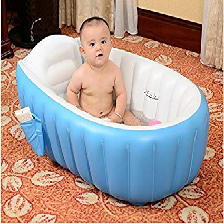

In [43]:
filename = 'test/test/baby-tub.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [37]:
# load and prepare the photograph
photo = extract_features('test/test/baby-tub.jpg')

In [38]:
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

young boy in blue shirt is playing in the water


### dogs

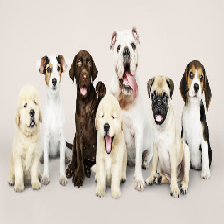

In [44]:
filename = 'test/test/dogs.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [45]:
photo = extract_features(filename)

In [46]:
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

two dogs are running in the grass


### Men and women

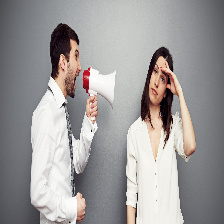

In [47]:
filename = 'test/test/How-Men-Are-Different-From-Women-Whole-Theory-Simplified-Here.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [48]:
photo = extract_features(filename)
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

man in black shirt is standing in front of the street


### Man and women

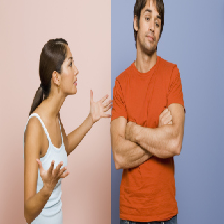

In [49]:
filename = 'test/test/man-and-woman-arguing.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [50]:
photo = extract_features(filename)
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

two women are standing in front of the beach


### man-surfing

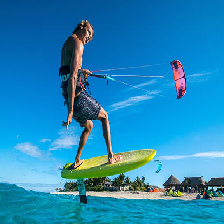

In [51]:
filename = 'test/test/man-surfing.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [52]:
photo = extract_features(filename)
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

two dogs are running through the snow


### Dog

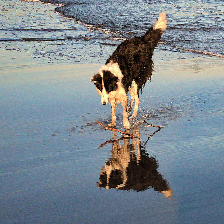

In [53]:
filename = 'test/example.jpg'
image = load_img(filename, target_size=(224, 224))
image

In [54]:
photo = extract_features(filename)
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

black dog is running through the water
